In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
import matplotlib
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import export_graphviz  
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')

matplotlib.rc('axes', unicode_minus = False)
from scipy.stats import chi2_contingency
from scipy import stats

from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [23]:
df= pd.read_csv("mergedata.csv",encoding='euc-kr')
df.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산시간,생산일자,불량여부,발생시간,발생시간파생,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,70.37,2021-01-03,양품,0,0,0,0.0,0,0,0
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,70.83,2021-01-03,양품,0,0,0,0.0,0,0,0
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,73.55,2021-01-03,양품,0,0,0,0.0,0,0,0
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,74.81,2021-01-03,양품,0,0,0,0.0,0,0,0
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,73.40,2021-01-03,양품,0,0,0,0.0,0,0,0


## 데이터 정제

### 불량여부 컬럼에서 불량 = 1, 양품 = 0으로 치환

In [24]:
df['불량여부'] = np.where(df['불량여부']=='불량',1 ,0)
df.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산시간,생산일자,불량여부,발생시간,발생시간파생,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,70.37,2021-01-03,0,0,0,0,0.0,0,0,0
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,70.83,2021-01-03,0,0,0,0,0.0,0,0,0
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,73.55,2021-01-03,0,0,0,0,0.0,0,0,0
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,74.81,2021-01-03,0,0,0,0,0.0,0,0,0
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,73.40,2021-01-03,0,0,0,0,0.0,0,0,0


## EDA 

Target looks like classification
Linear Discriminant Analysis training set score: 1.000


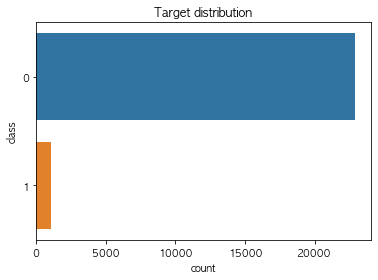

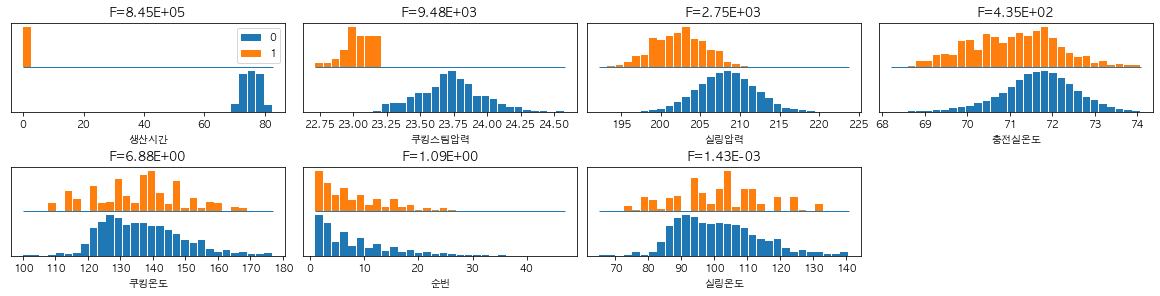

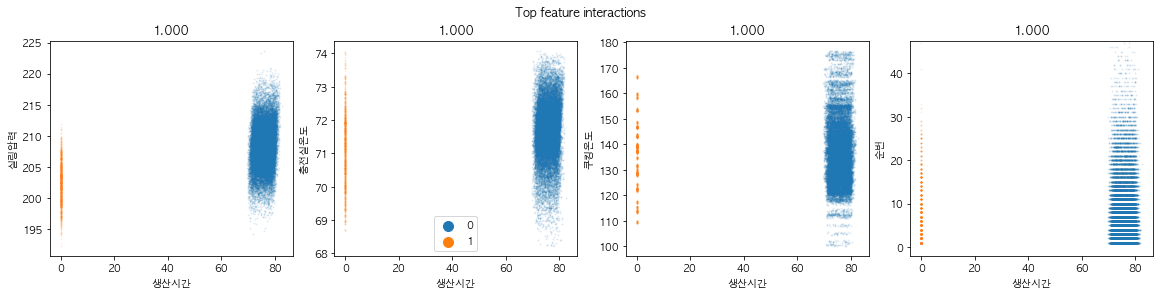

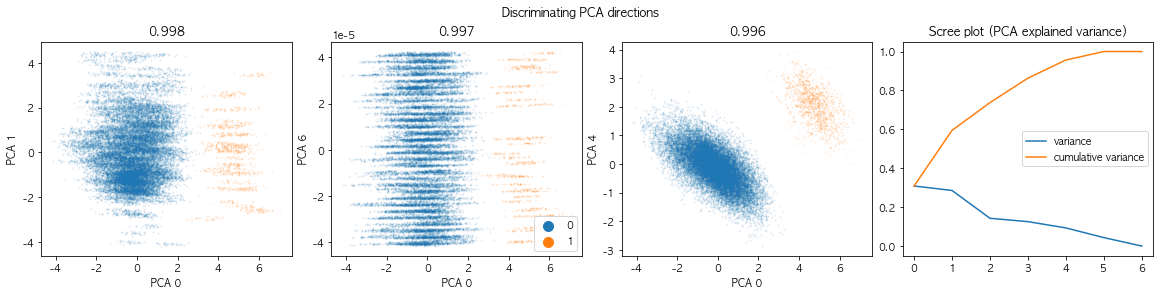

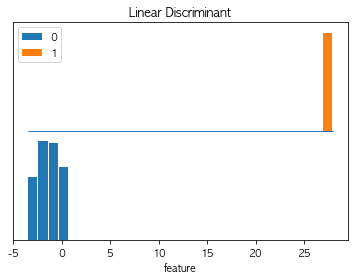

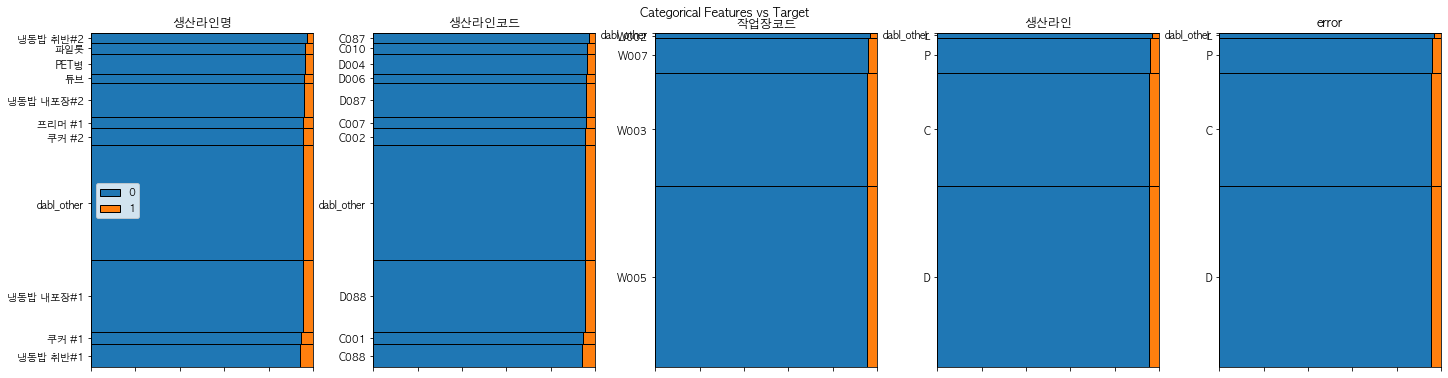

In [52]:
import dabl

df_result_x = df.drop('불량여부',axis=1)
df_result_y = df['불량여부']


dabl.plot(df_result_x, df_result_y)
plt.show()

## boxplot

<AxesSubplot:>

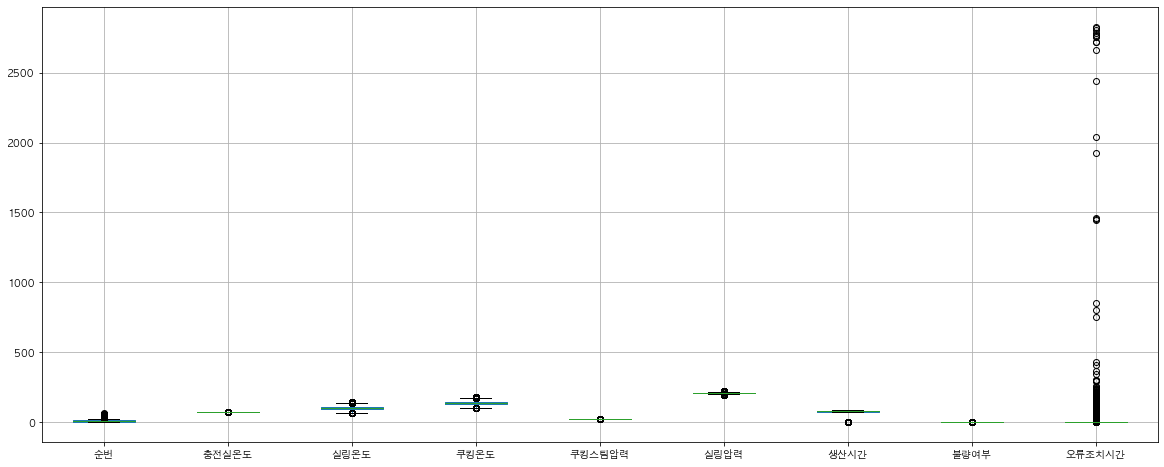

In [5]:
df.boxplot(figsize= (20,8))

## countplot

### 불량/ 양품 여부 개수

<AxesSubplot:xlabel='불량여부', ylabel='count'>

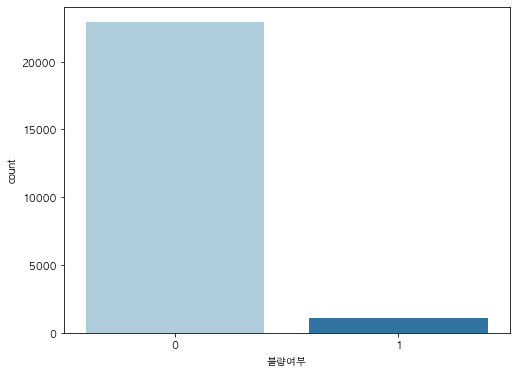

In [32]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(df['불량여부'],palette=palette)

### 작업장코드별 불량률 

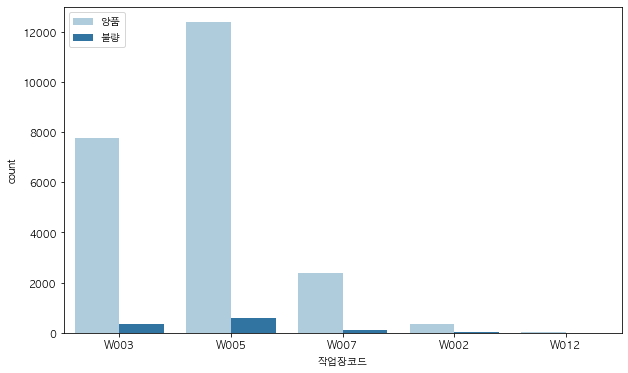

In [28]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (10,6))

sns.countplot(x = '작업장코드', hue = '불량여부', data = df, ax = ax, palette=palette)
labels = ['양품', '불량']
ax.legend(labels = labels)

### 생산라인별 불량률

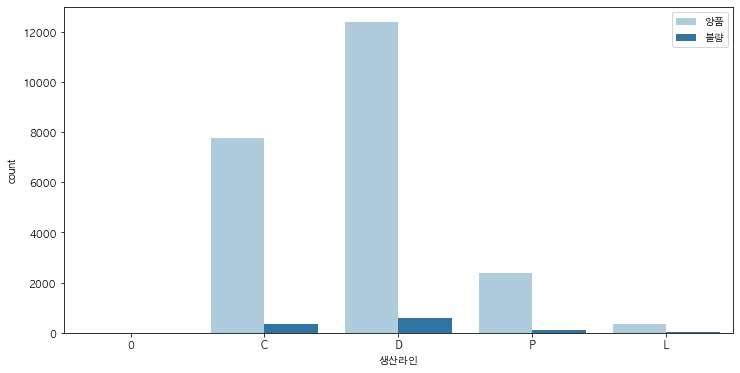

In [29]:
df['생산라인'] = 0

for i in range(2,len(df)) :
    
    if 'C' in df['생산라인코드'][i] :
        df['생산라인'][i] = 'C'
    elif 'D' in df['생산라인코드'][i] :
        df['생산라인'][i] = 'D'
    elif 'L' in df['생산라인코드'][i] :
        df['생산라인'][i] = 'L'
    else :
        df['생산라인'][i] = 'P'

        
fig, ax = plt.subplots(figsize = (12,6))

sns.countplot(x = '생산라인', hue = '불량여부', data = df, ax = ax, palette=palette)

labels = ['양품', '불량']
ax.legend(labels = labels)
palette = sns.color_palette('Paired',9)   

## Histogram

In [6]:
#범주형 제외한 데이터 새로 만들기
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric_x = df_numeric.drop("불량여부", axis = 1)
df_numeric_y = df_numeric["불량여부"]
df_numeric_x.head()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,오류조치시간
0,3,71.669853,96.769853,131.742003,23.315,201.844,70.37,0.0
1,1,70.386480,102.086480,136.926080,23.226,212.043,70.83,0.0
2,13,71.206130,112.306130,147.579680,23.516,208.781,73.55,0.0
3,7,70.430565,96.030565,131.569165,23.692,208.269,74.81,0.0
4,2,72.179318,114.079318,149.928068,23.899,211.625,73.40,0.0


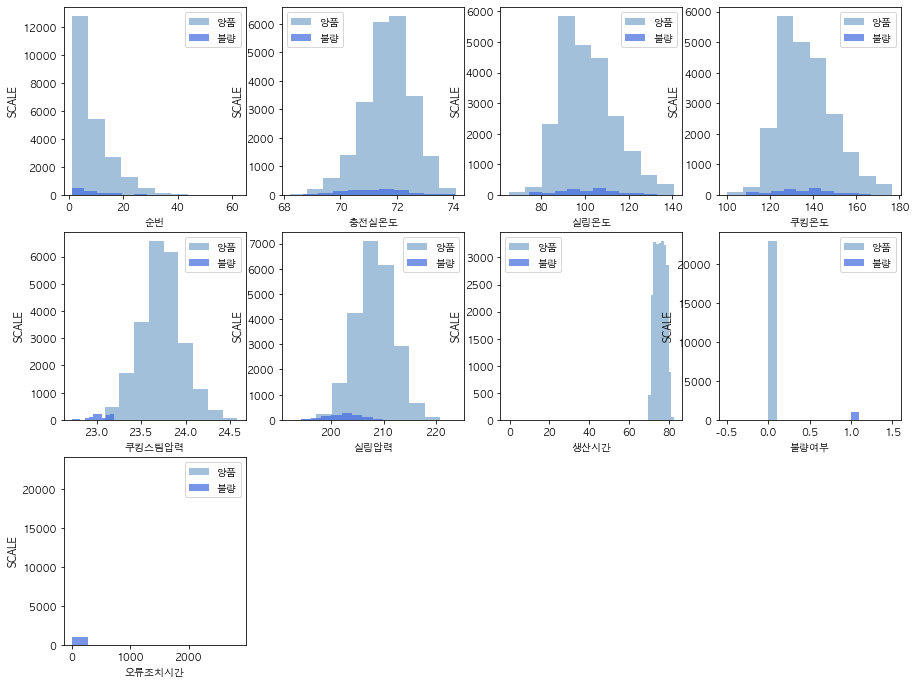

In [7]:
i = 0
columns = df_numeric.columns
palette = sns.color_palette('Paired',9)

fig = plt.figure(figsize = (15, 20))

for col in df_numeric.columns:
    plt.subplot(df.shape[1]//4, 4, i+1)
    i += 1
    plt.hist(df[df["불량여부"] == 0][col], label = "양품", alpha = 0.5,color='steelblue')
    plt.hist(df[df["불량여부"] == 1][col], label = "불량", alpha = 0.7,color='royalblue')
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
    
plt.show()

## HeatMap

상관관계 확인

<AxesSubplot:>

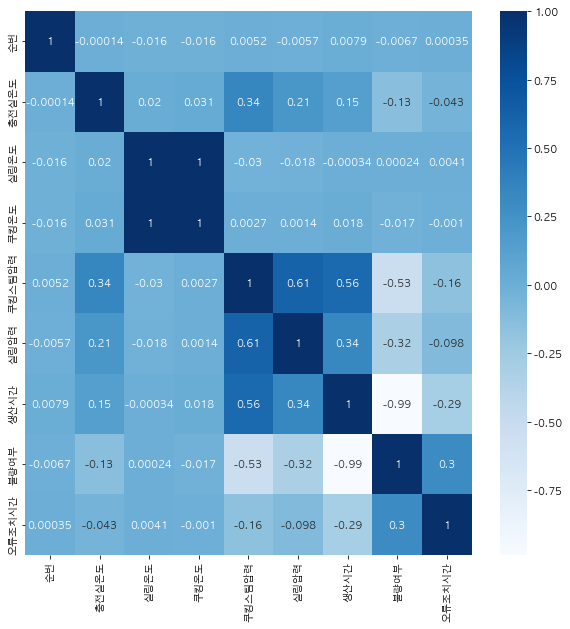

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True,cmap='Blues')

In [8]:
df.corr()

,순번,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,불량여부,오류조치시간
순번,1.000000,-0.000143,-0.015994,-0.015835,0.005161,-0.005664,0.007926,-0.006737,0.000354
충전실온도,-0.000143,1.000000,0.019904,0.030919,0.341127,0.209220,0.145270,-0.133581,-0.043387
실링온도,-0.015994,0.019904,1.000000,0.999480,-0.029540,-0.018241,-0.000341,0.000244,0.004134
쿠킹온도,-0.015835,0.030919,0.999480,1.000000,0.002713,0.001430,0.017753,-0.016934,-0.001009
쿠킹스팀압력,0.005161,0.341127,-0.029540,0.002713,1.000000,0.609913,0.560809,-0.532398,-0.159459
실링압력,-0.005664,0.209220,-0.018241,0.001430,0.609913,1.000000,0.338934,-0.320763,-0.098486
생산시간,0.007926,0.145270,-0.000341,0.017753,0.560809,0.338934,1.000000,-0.986116,-0.293225
불량여부,-0.006737,-0.133581,0.000244,-0.016934,-0.532398,-0.320763,-0.986116,1.000000,0.297353
오류조치시간,0.000354,-0.043387,0.004134,-0.001009,-0.159459,-0.098486,-0.293225,0.297353,1.000000


## Pie Chart

### 오류발생작업장명 별 불량 %

<AxesSubplot:ylabel='불량여부'>

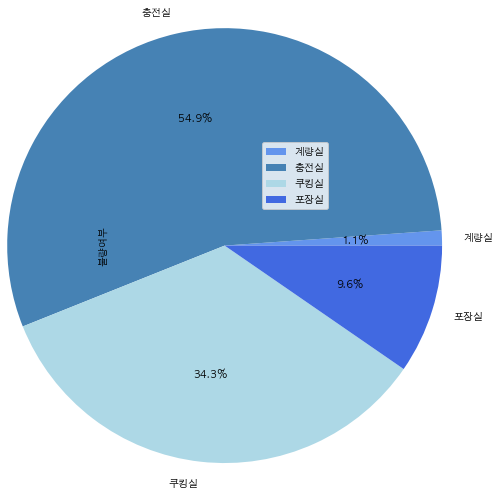

In [35]:
dfs = df[df["불량여부"] == 1]
dfcount = dfs.groupby("오류발생작업장명", as_index = False).agg("count")

colors = ['cornflowerblue','steelblue','lightblue', 'royalblue']
dfcount.plot.pie(y="불량여부", labels = dfcount["오류발생작업장명"], autopct="%.1f%%", radius = 2.5,colors=colors)

## Scatterplot

<AxesSubplot:xlabel='쿠킹스팀압력', ylabel='오류조치시간'>

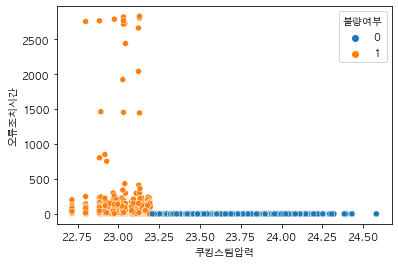

In [41]:
sns.scatterplot(data=df, x='쿠킹스팀압력',y='오류조치시간',hue='불량여부')

<AxesSubplot:xlabel='실링온도', ylabel='오류조치시간'>

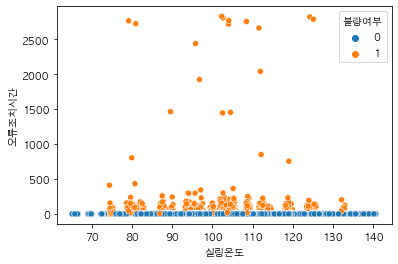

In [94]:
sns.scatterplot(data=df, x='실링온도',y='오류조치시간',hue='불량여부')

<AxesSubplot:xlabel='실링압력', ylabel='오류조치시간'>

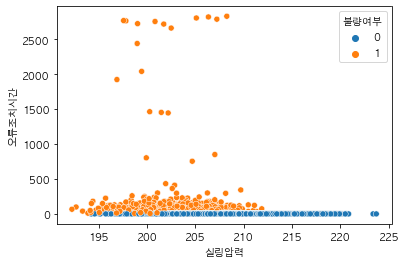

In [53]:
sns.scatterplot(data=df, x="실링압력", y="오류조치시간", hue="불량여부")